In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [7]:
x,y = mnist["data"], mnist["target"]
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

# To look into the datasamples:-
To view the image of a single digit,all we need to do is grab an instances feature vector,reshape it to 28x28 array,and display it using matplotlib's imshow() function.

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

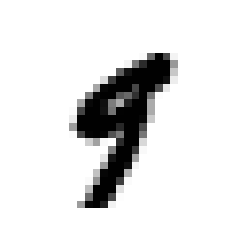

In [10]:
some_digit = x[36000] #selecting 36000th image in the dataset
some_digit_image = some_digit.reshape(28,28)#reshaping the image into 28x28 pixels
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = "nearest")
plt.axis('off')
plt.show()

The image look like 9. Lets verify it.

In [11]:
y[18000]

'4'

In [12]:
# Lets split the data into training and test with 60,000 images in training set and rest 10000 in test set

X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [13]:
import numpy as np
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Forming the dataset and training the Classifier

In [14]:
#Example:-
from sklearn.linear_model import SGDClassifier
x1 = {"xcoord":pd.Series([0,1]),"ycoord":pd.Series([0,1])}
x3 = pd.DataFrame(x1)
y = [0,1]
clf = SGDClassifier(loss = "hinge", penalty = "l2")
clf.fit(x3,y)
#In SGDClassifier penalty is l2 not 12.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)
#y_train_9 = y_train_9.astype(np.uint8)

In [33]:
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42, max_iter=10) 
sgd_clf.fit(X_train, y_train_9)

ValueError: bad input shape ()

In [17]:
print(clf.coef_)

[[9.85221675 9.85221675]]


In [18]:
print(clf.intercept_[0])

-9.99002993014969


In [31]:
# Note that the label is a string. Most ML algorithms expect numbers, so let’s cast y to integer:
y_train = y_train_9.astype(np.uint8)
y_train = pd.to_numeric(y_train_9)

AttributeError: 'bool' object has no attribute 'astype'

In [20]:
y

[0, 1]

In [21]:
# Lets split the data into training and test with 60,000 images in training set and rest 10000 in test set

X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [22]:
# Train the RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)

In [23]:
# Get Probabilities using cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
y_probas_forest

ValueError: Found input variables with inconsistent numbers of samples: [60000, 2]